In [1]:
!pip install pycoingecko
import pandas as pd
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
bitcoin_data = cg.get_coin_market_chart_by_id(id = 'bitcoin', vs_currency = 'usd',days = 30)
print(bitcoin_data)
data = pd.DataFrame(bitcoin_data,columns = ['TimeStamp','Price'])
print(data)

{'prices': [[1727029529284, 62924.27314216407], [1727032430770, 62898.99272469967], [1727035850287, 63238.25175392767], [1727040317650, 63304.5401448964], [1727042651249, 62734.546819803894], [1727046633974, 63849.17256282697], [1727050243712, 63458.9142356631], [1727054442597, 63776.94859257198], [1727056940543, 63820.0405246694], [1727061728672, 64501.15829950209], [1727064099283, 64306.459582669086], [1727069159881, 63792.9532888288], [1727072365009, 63651.56887446489], [1727075255559, 63624.815594830434], [1727078960068, 63439.76687029365], [1727082545646, 63556.53491966304], [1727085662563, 63638.03054249659], [1727089935368, 63418.90810348824], [1727093988901, 63342.77255777203], [1727096841052, 63365.70408770886], [1727100554179, 63256.27299901569], [1727104243065, 63178.5404933955], [1727107955327, 63579.928590958574], [1727112120390, 63211.27843149886], [1727115923776, 63412.95660391257], [1727118841535, 63379.45064316519], [1727122479731, 63377.9661035729], [1727126889772, 63

In [3]:
def get_crypto_data(crypto_id='bitcoin'):
    data = cg.get_coins_markets(vs_currency='usd', ids=crypto_id)
    return data

In [4]:
btc_data = get_crypto_data('bitcoin')
print(btc_data)

[{'id': 'bitcoin', 'symbol': 'btc', 'name': 'Bitcoin', 'image': 'https://coin-images.coingecko.com/coins/images/1/large/bitcoin.png?1696501400', 'current_price': 67245, 'market_cap': 1330424862754, 'market_cap_rank': 1, 'fully_diluted_valuation': 1413092239125, 'total_volume': 36198980063, 'high_24h': 67941, 'low_24h': 66669, 'price_change_24h': 100.96, 'price_change_percentage_24h': 0.15036, 'market_cap_change_24h': 740220638, 'market_cap_change_percentage_24h': 0.05567, 'circulating_supply': 19771478.0, 'total_supply': 21000000.0, 'max_supply': 21000000.0, 'ath': 73738, 'ath_change_percentage': -8.74522, 'ath_date': '2024-03-14T07:10:36.635Z', 'atl': 67.81, 'atl_change_percentage': 99133.72102, 'atl_date': '2013-07-06T00:00:00.000Z', 'roi': None, 'last_updated': '2024-10-22T18:24:22.116Z'}]


In [5]:
def get_crypto_prices(ids_list):
    prices = cg.get_price(ids=ids_list, vs_currencies='usd')
    return prices
prices = get_crypto_prices(['bitcoin', 'ethereum'])
print(prices)

{'bitcoin': {'usd': 67414}, 'ethereum': {'usd': 2628.14}}


In [14]:
def get_historical_data(crypto_id='bitcoin', days=30):
    historical_data = cg.get_coin_market_chart_by_id(id=crypto_id, vs_currency='usd', days=days)
    return historical_data
btc_historical = get_historical_data('bitcoin', 30)

def convert_to_dataframe(historical_data):
    prices = historical_data['prices']
    df = pd.DataFrame(prices, columns=['Timestamp', 'Price'])
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
    return df
btc_df = convert_to_dataframe(btc_historical)
print(btc_df.head())


                Timestamp         Price
0 2024-09-22 18:25:29.284  62924.273142
1 2024-09-22 19:13:50.770  62898.992725
2 2024-09-22 20:10:50.287  63238.251754
3 2024-09-22 21:25:17.650  63304.540145
4 2024-09-22 22:04:11.249  62734.546820


In [12]:
def get_trending_cryptos():
    trending = cg.get_search_trending()
    return trending
trending_coins = get_trending_cryptos()
for i, coin in enumerate(trending_coins['coins']):
    print(f"{i+1}. {coin['item']['name']} ({coin['item']['symbol']})")

1. Phil (PHIL)
2. Scroll (SCR)
3. KOALA AI (KOKO)
4. Simon's Cat (CAT)
5. Aptos (APT)
6. SPX6900 (SPX)
7. Sui (SUI)
8. ApeCoin (APE)
9. AI Companions (AIC)
10. Goatseus Maximus (GOAT)
11. Solana (SOL)
12. Pixels (PIXEL)
13. DeepBook (DEEP)
14. ZKsync (ZK)
15. Raydium (RAY)


In [11]:
def get_exchange_data(exchange_id='binance'):
    exchange = cg.get_exchanges_by_id(id=exchange_id)
    return exchange
binance_data = get_exchange_data('binance')
print(binance_data)

{'name': 'Binance', 'year_established': 2017, 'country': 'Cayman Islands', 'description': '', 'url': 'https://www.binance.com/', 'image': 'https://coin-images.coingecko.com/markets/images/52/small/binance.jpg?1706864274', 'facebook_url': 'https://www.facebook.com/binanceexchange', 'reddit_url': 'https://www.reddit.com/r/binance/', 'telegram_url': '', 'slack_url': '', 'other_url_1': 'https://medium.com/binanceexchange', 'other_url_2': 'https://steemit.com/@binanceexchange', 'twitter_handle': 'binance', 'has_trading_incentive': False, 'centralized': True, 'public_notice': '', 'alert_notice': '', 'trust_score': 10, 'trust_score_rank': 1, 'trade_volume_24h_btc': 201546.98265709612, 'trade_volume_24h_btc_normalized': 117713.66623698563, 'tickers': [{'base': 'BTC', 'target': 'USDT', 'market': {'name': 'Binance', 'identifier': 'binance', 'has_trading_incentive': False}, 'last': 67469.76, 'volume': 25524.54589, 'converted_last': {'btc': 0.9993384, 'eth': 25.633921, 'usd': 67424, 'usd_v2': 6742

In [10]:
def get_global_data():
    global_data = cg.get_global()
    return global_data
global_data = get_global_data()
print(global_data)

{'active_cryptocurrencies': 14969, 'upcoming_icos': 0, 'ongoing_icos': 49, 'ended_icos': 3376, 'markets': 1137, 'total_market_cap': {'btc': 36129668.43283621, 'eth': 926758194.2924072, 'ltc': 34940954461.10939, 'bch': 6832845249.528895, 'bnb': 4095154539.655666, 'eos': 5015006357884.679, 'xrp': 4557918985059.996, 'xlm': 25554799717890.26, 'link': 201098636407.70557, 'dot': 563156306381.1521, 'yfi': 477930457.097485, 'usd': 2437625154404.8374, 'aed': 8953397192128.979, 'ars': 2398019127922100.5, 'aud': 3646350838718.319, 'bdt': 291323175836086.3, 'bhd': 919001746586.7031, 'bmd': 2437625154404.8374, 'brl': 13913233093796.486, 'cad': 3368700458381.3096, 'chf': 2109130788597.2402, 'clp': 2312916251505487.0, 'cny': 17363203974825.658, 'czk': 56893686016403.32, 'dkk': 16829576139399.414, 'eur': 2256643674816.05, 'gbp': 1878078050711.8247, 'gel': 6630340419981.169, 'hkd': 18944939935516.504, 'huf': 903406830025635.6, 'idr': 3.793797909057961e+16, 'ils': 9186092889368.44, 'inr': 20496774035963

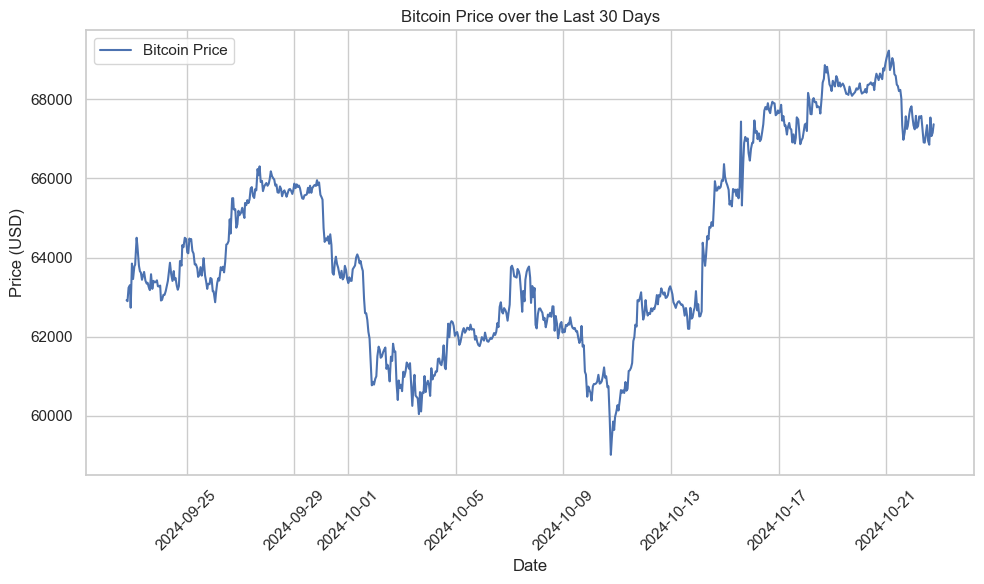

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set(style='whitegrid')

# Plot the Price over Time
plt.figure(figsize=(10, 6))
plt.plot(btc_df['Timestamp'], btc_df['Price'], label='Bitcoin Price', color='b')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price over the Last 30 Days')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


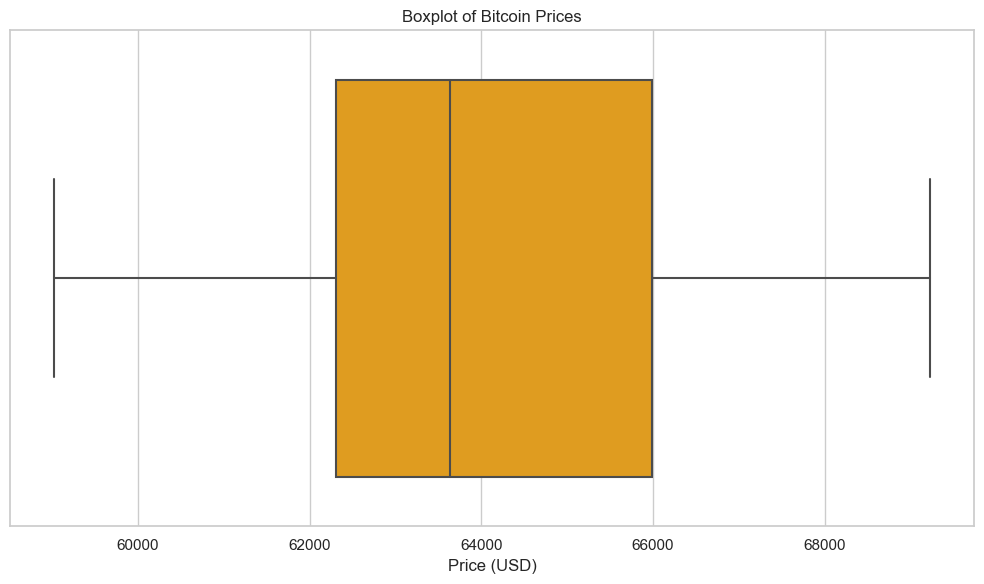

In [16]:
# Plot a boxplot to check for outliers in the price data
plt.figure(figsize=(10, 6))
sns.boxplot(x=btc_df['Price'], color='orange')
plt.title('Boxplot of Bitcoin Prices')
plt.xlabel('Price (USD)')
plt.tight_layout()
plt.show()


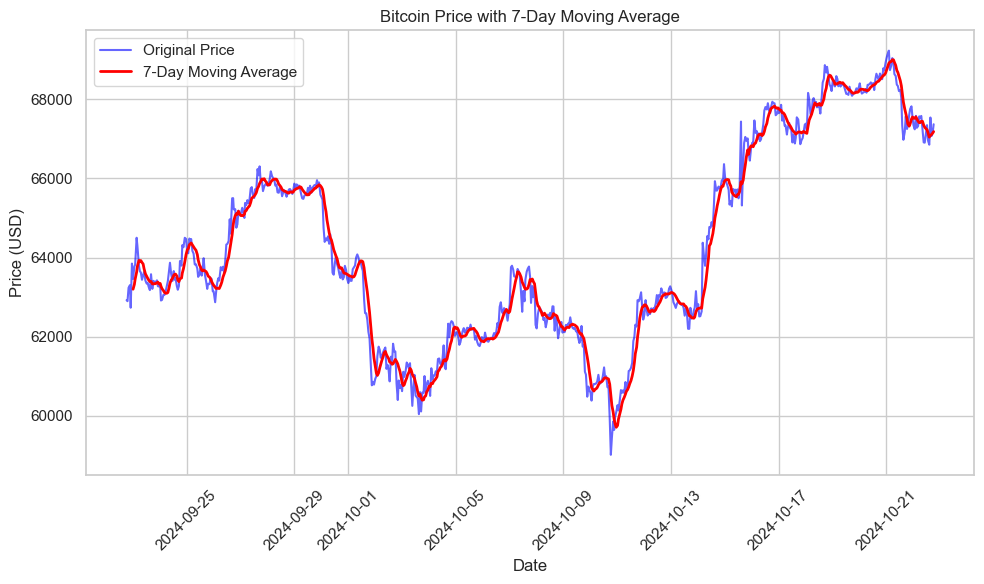

In [18]:
# Calculate the moving average (e.g., 7-day moving average)
btc_df['Moving_Avg'] = btc_df['Price'].rolling(window=7).mean()

# Plot the original prices and moving average together
plt.figure(figsize=(10, 6))
plt.plot(btc_df['Timestamp'], btc_df['Price'], label='Original Price', color='blue', alpha=0.6)
plt.plot(btc_df['Timestamp'], btc_df['Moving_Avg'], label='7-Day Moving Average', color='red', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price with 7-Day Moving Average')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
